# Ejercicio 5

5.- Diseña un modelo en Keras que utilice capas densas, LSTM, GRU, y convolucionales para predecir los valores de cierre Amazon utilizando como entrada los valores de apertura de los datos Amazon, Microsoft, Meta (facebook), Apple y Google de los 4 días anteriores. Compáralo con un modelo con una capa lineal.

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv1D, Flatten, GRU, LSTM
from tensorflow.keras import regularizers;

In [4]:
data = yf.download("AMZN AAPL CSCO GOOGL MSFT", period="max")

[*********************100%***********************]  5 of 5 completed


In [5]:
data_close = data["Close"].dropna(how="any")["AMZN"]
data_open = data["Open"].dropna(how="any")

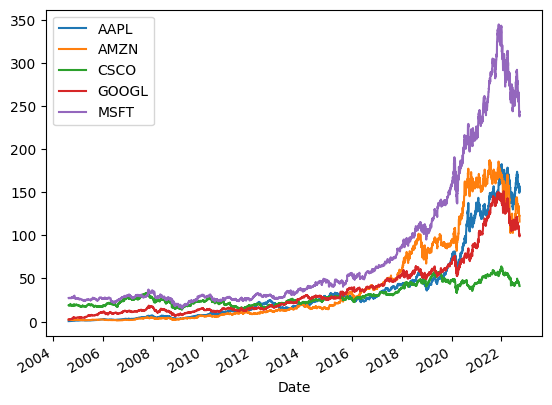

In [6]:
data_open.plot();


In [51]:
from  sklearn.preprocessing import MinMaxScaler

In [53]:
scaler = MinMaxScaler()
scaler.fit(data_open.AMZN.values.reshape(-1,1))

MinMaxScaler()

In [36]:
#data_open_scale = data_open
#data_close_scale = data_close

#data_open_scale = data_open/data_open.iloc[0,0]
#data_close_scale = data_close/data_close[0]

data_open_scale = np.log(data_open).diff().fillna(1).cumsum()
data_close_scale = np.log(data_close).diff().fillna(1).cumsum()


<AxesSubplot: xlabel='Date'>

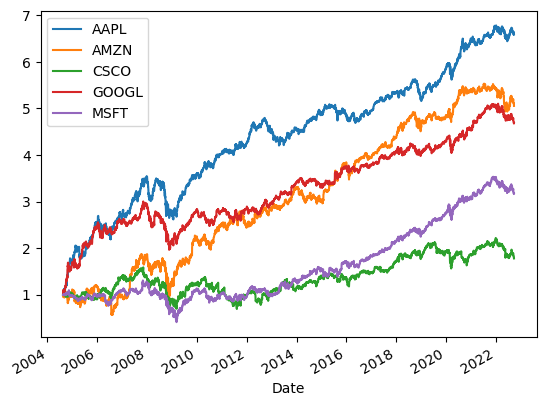

In [37]:
data_open_scale.plot()

In [38]:
batch_size = 4
n_valores = data_open_scale.shape[0] -(data_open_scale.shape[0]%batch_size)
X = data_open_scale.iloc[:n_valores, :].values.reshape(-1, batch_size, 5)
Y = data_close_scale[(batch_size-1):n_valores:batch_size].values

In [39]:
umbral = int(len(X)*0.9)
X_train, X_test = X[:umbral], X[umbral:]
Y_train, Y_test = Y[:umbral], Y[umbral:]

### Modelo Lineal

In [52]:
model_lineal = Sequential(name='lineal')
model_lineal.add(Flatten(input_shape=(4,5)))
model_lineal.add(Dense(1))
model_lineal.summary();

Model: "lineal"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 20)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 21        
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [53]:
opt_adam = Adam(learning_rate = 1e-4)
model_lineal.compile(optimizer=opt_adam,
                   loss='mae',
                   metrics=['mse'])

In [54]:
history = model_lineal.fit(X_train,
                        Y_train,
                        validation_split = 0.2,
                        epochs=1000,
                        batch_size=128)

Epoch 1/1000
7/7 [==============================] - 1s 28ms/step - loss: 4.1690 - mse: 19.2420 - val_loss: 7.5770 - val_mse: 57.7771
Epoch 2/1000
7/7 [==============================] - 0s 9ms/step - loss: 4.1366 - mse: 18.9501 - val_loss: 7.5231 - val_mse: 56.9596
Epoch 3/1000
7/7 [==============================] - 0s 13ms/step - loss: 4.1041 - mse: 18.6601 - val_loss: 7.4692 - val_mse: 56.1484
Epoch 4/1000
7/7 [==============================] - 0s 11ms/step - loss: 4.0717 - mse: 18.3728 - val_loss: 7.4153 - val_mse: 55.3422
Epoch 5/1000
7/7 [==============================] - 0s 18ms/step - loss: 4.0394 - mse: 18.0904 - val_loss: 7.3613 - val_mse: 54.5414
Epoch 6/1000
7/7 [==============================] - 0s 17ms/step - loss: 4.0068 - mse: 17.8032 - val_loss: 7.3076 - val_mse: 53.7497
Epoch 7/1000
7/7 [==============================] - 0s 14ms/step - loss: 3.9744 - mse: 17.5242 - val_loss: 7.2537 - val_mse: 52.9612
Epoch 8/1000
7/7 [==============================] - 0s 14ms/step - los

In [55]:
score = model_lineal.evaluate(X_test, Y_test)
score

4/4 [==============================] - 0s 2ms/step - loss: 0.1677 - mse: 0.0302


[0.16766665875911713, 0.030248157680034637]

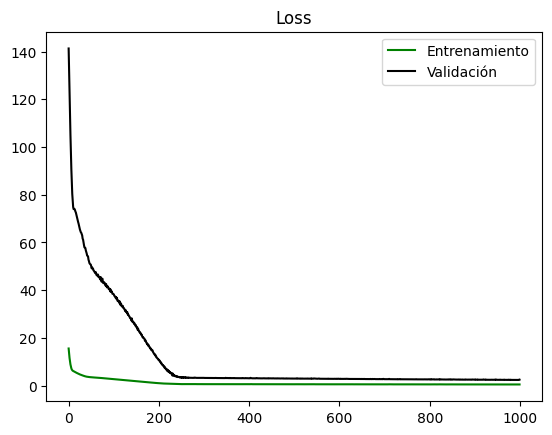

In [22]:
plt.title("Loss")
plt.plot(history.history['loss'],
         color='green',
         label="Entrenamiento")
plt.plot(history.history['val_loss'],
         color='black',
         label="Validación")
plt.legend()
#plt.yscale("log")

In [57]:
model = Sequential()

model.add(Conv1D(128, 2, padding="same", activation="relu", input_shape=(4,5)))
model.add(LSTM(8, activation="relu", return_sequences=True))
model.add(GRU(16, activation="relu"))
model.add(Flatten())
model.add(Dense(1))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 4, 128)            1408      
                                                                 
 lstm_7 (LSTM)               (None, 4, 8)              4384      
                                                                 
 gru_7 (GRU)                 (None, 16)                1248      
                                                                 
 flatten_11 (Flatten)        (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 7,057
Trainable params: 7,057
Non-trainable params: 0
_________________________________________________________________


In [58]:
opt_adam = Adam(learning_rate = 1e-4)
model.compile(optimizer=opt_adam,
                            loss='mae',
                            metrics=['mae'])

In [59]:
history = model.fit(X_train,
                                       Y_train,
                                        validation_split = 0.2,
                                        epochs=1000,
                                        batch_size=32)

Epoch 1/1000
26/26 [==============================] - 4s 34ms/step - loss: 2.3528 - mae: 2.3528 - val_loss: 4.7502 - val_mae: 4.7502
Epoch 2/1000
26/26 [==============================] - 0s 15ms/step - loss: 2.2675 - mae: 2.2675 - val_loss: 4.5212 - val_mae: 4.5212
Epoch 3/1000
26/26 [==============================] - 0s 13ms/step - loss: 2.0902 - mae: 2.0902 - val_loss: 4.0247 - val_mae: 4.0247
Epoch 4/1000
26/26 [==============================] - 0s 13ms/step - loss: 1.7480 - mae: 1.7480 - val_loss: 3.1719 - val_mae: 3.1719
Epoch 5/1000
26/26 [==============================] - 0s 13ms/step - loss: 1.1655 - mae: 1.1655 - val_loss: 1.9275 - val_mae: 1.9275
Epoch 6/1000
26/26 [==============================] - 0s 11ms/step - loss: 0.4269 - mae: 0.4269 - val_loss: 0.4760 - val_mae: 0.4760
Epoch 7/1000
26/26 [==============================] - 0s 12ms/step - loss: 0.2174 - mae: 0.2174 - val_loss: 0.4772 - val_mae: 0.4772
Epoch 8/1000
26/26 [==============================] - 0s 14ms/step - 

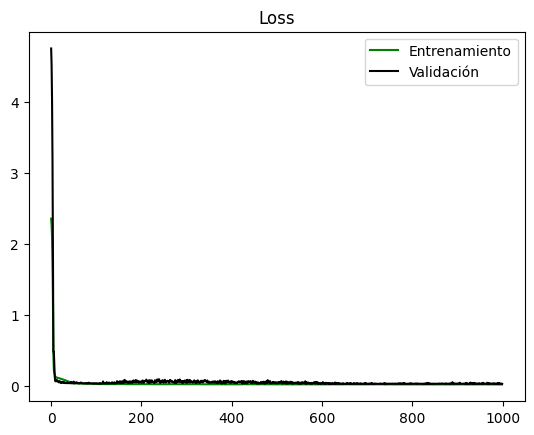

In [61]:
plt.title("Loss")
plt.plot(history.history['loss'],
         color='green',
         label="Entrenamiento")
plt.plot(history.history['val_loss'],
         color='black',
         label="Validación")
plt.legend()
#plt.yscale("log")

In [51]:
score = model.evaluate(X_test, Y_test)
score

4/4 [==============================] - 0s 2ms/step - loss: 0.0051 - mae: 0.0647


[0.005125501658767462, 0.06470425426959991]

In [62]:
y_hat = model.predict(X_train)

33/33 [==============================] - 0s 4ms/step


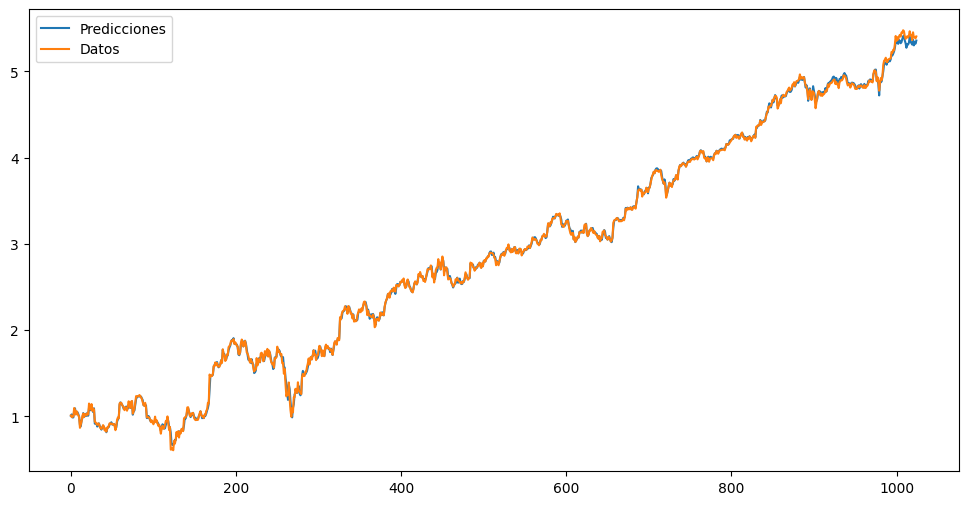

In [69]:
plt.figure(figsize=(12,6))
plt.plot(y_hat, label="Predicciones")
plt.plot(Y_train, label="Datos")
plt.legend()

In [71]:
y_hat_test = model.predict(X_test)

4/4 [==============================] - 0s 5ms/step


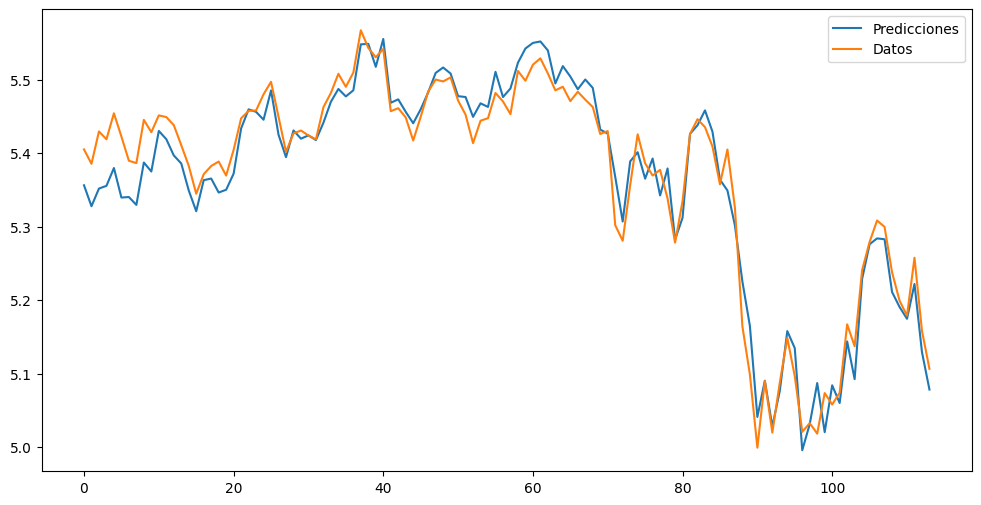

In [72]:
plt.figure(figsize=(12,6))
plt.plot(y_hat_test, label="Predicciones")
plt.plot(Y_test, label="Datos")
plt.legend()

In [75]:
y_hat = model_lineal.predict(X_test)

4/4 [==============================] - 0s 2ms/step


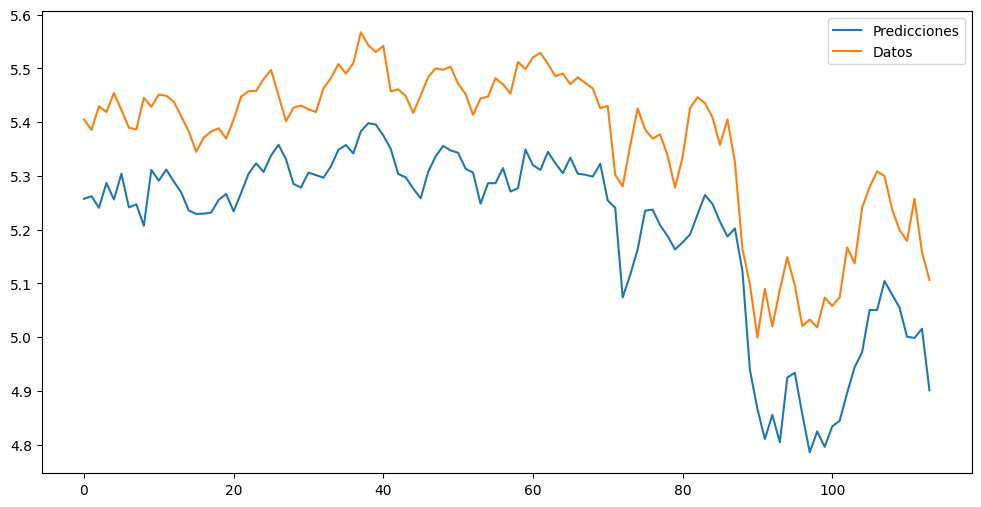

In [76]:
plt.figure(figsize=(12,6))
plt.plot(y_hat, label="Predicciones")
plt.plot(Y_test, label="Datos")
plt.legend()